# Instalación de bibliotecas

In [1]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables

In [3]:
archivo_entrada = 'datos_ejemplo.xlsx'
archivo_salida = 'resultados.csv'

# Definir variables para los nombres de las columnas
col_producto = 'Producto'
col_fabricados = 'Fabricados'
col_coste_unitario = 'Coste Unitario'
col_vendidos = 'Vendidos'
col_precio_venta = 'Precio de Venta'
col_coste_total = 'Coste Total'
col_ingresos_totales = 'Ingresos Totales'
col_ganancia = 'Ganancia'

# Leer datos

In [4]:
# Leer el archivo Excel (asegúrate de que el archivo esté en la misma carpeta o proporciona la ruta completa)
df = pd.read_excel(archivo_entrada)  # Cambia el nombre al de tu archivo Excel
print(df.head())  # Mostrar las primeras filas del DataFrame

     Producto  Fabricados  Coste Unitario  Vendidos  Precio de Venta
0  Producto_1         152       97.291887        40       155.965054
1  Producto_2         485       84.919838       348        96.528057
2  Producto_3         398       29.110520       186        57.429499
3  Producto_4         320       26.364247       293       122.186059
4  Producto_5         156       26.506406       108        25.636393


# Operar con datos

In [5]:
# Calcular Costo Total, Ingresos Totales y Ganancia
df[col_coste_total] = df[col_fabricados] * df[col_coste_unitario]
df[col_ingresos_totales] = df[col_vendidos] * df[col_precio_venta]
df[col_ganancia] = df[col_ingresos_totales] - df[col_coste_total]

# Calcular totales
total_costes = df[col_coste_total].sum()
total_ingresos = df[col_ingresos_totales].sum()
total_ganancia = df[col_ganancia].sum()

# Mostrar los resultados
print(f"Total Ingresos: {total_ingresos}")
print(f"Total Costes: {total_costes}")
print(f"Total Ganancia: {total_ganancia}")


Total Ingresos: 576966.0037108366
Total Costes: 237647.53969088846
Total Ganancia: 339318.46401994803


# Guardar datos

In [6]:
# Crear un DataFrame para los totales
totales = pd.DataFrame({
    col_producto: ['Total'],
    col_fabricados: [df[col_fabricados].sum()],
    col_coste_unitario: ['-'],
    col_vendidos: [df[col_vendidos].sum()],
    col_precio_venta: ['-'],
    col_coste_total: [total_costes],
    col_ingresos_totales: [total_ingresos],
    col_ganancia: [total_ganancia]
})

# Combinar los datos originales con los totales
df_final = pd.concat([df, totales], ignore_index=True)

In [7]:
# Guardar el DataFrame final como un archivo CSV
df_final.to_csv(archivo_salida, index=False, sep=';')
print(f"\nArchivo '{archivo_salida}' ha sido guardado con los datos y totales.")


Archivo 'resultados.csv' ha sido guardado con los datos y totales.


# Charts

In [8]:
titulo_barras = 'Ingresos, Costos y Ganancias por Producto'
titulo_pie_ingresos = 'Distribución de Ingresos por Producto'
titulo_pie_costes = 'Distribución de Costes por Producto'
titulo_pie_ganancias = 'Distribución de Ganancias por Producto'

## Bar Chart

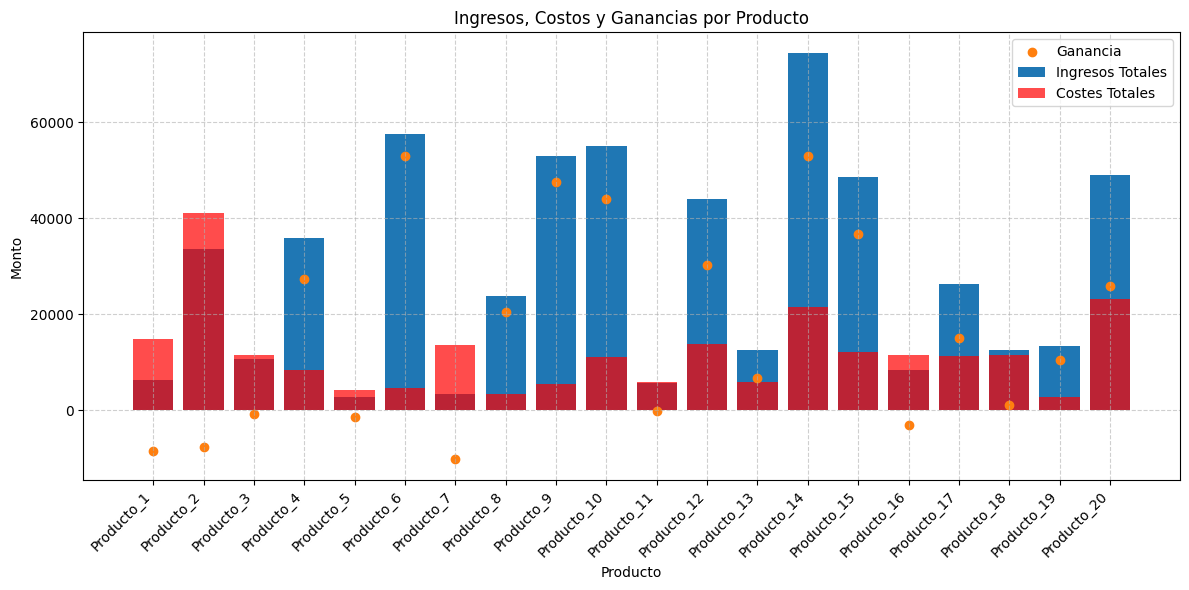

In [9]:
# Gráfica de barras para visualizar Costos, Ingresos y Ganancias por Producto
plt.figure(figsize=(12, 6))
plt.bar(df[col_producto], df[col_ingresos_totales], label='Ingresos Totales')
plt.bar(df[col_producto], df[col_coste_total],color='red', label='Costes Totales', alpha=0.7)
plt.scatter(df[col_producto], df[col_ganancia], label='Ganancia', marker='o')  # Usar scatter para ganancias

# Configuración de la gráfica
plt.title(titulo_barras)
plt.xlabel(col_producto)
plt.ylabel('Monto')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica de barras
plt.tight_layout()
plt.show()

## Pie chart


Productos con pérdidas:
       Producto      Ganancia
0    Producto_1  -8549.764623
1    Producto_2  -7594.357293
2    Producto_3   -904.100072
4    Producto_5  -1366.268913
6    Producto_7 -10288.743213
10  Producto_11   -282.405765
15  Producto_16  -3096.040451


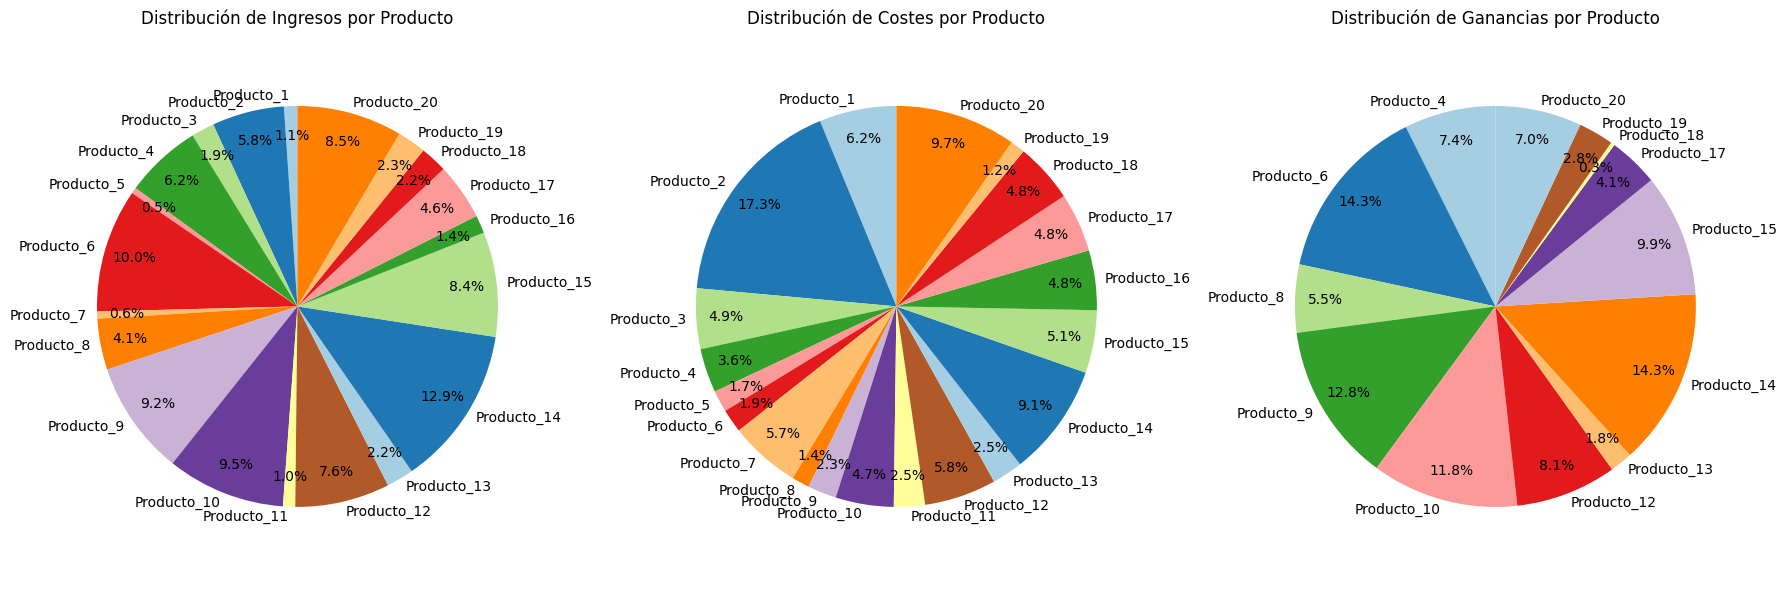

In [10]:
# Crear gráficos de pastel para los totales de Ingresos, Costos y Ganancias por producto
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Configuración general de las etiquetas para evitar superposición
def plot_pie(ax, values, labels, title):
    ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        pctdistance=0.85,   # Ajustar distancia del porcentaje
        labeldistance=1.05  # Ajustar distancia de las etiquetas
    )
    ax.set_title(title)

# Gráfico de pastel para Ingresos Totales
plot_pie(axs[0], df[col_ingresos_totales], df[col_producto], titulo_pie_ingresos)

# Gráfico de pastel para Costos Totales
plot_pie(axs[1], df[col_coste_total], df[col_producto], titulo_pie_costes)

# Preparar datos para el gráfico de Ganancias
ganancias_positivas = df[df[col_ganancia] >= 0]
perdidas = df[df[col_ganancia] < 0]

# Gráfico de pastel para Ganancias
if not ganancias_positivas.empty:
    plot_pie(axs[2], ganancias_positivas[col_ganancia], ganancias_positivas[col_producto], titulo_pie_ganancias)
else:
    axs[2].text(0.5, 0.5, 'No hay ganancias', horizontalalignment='center', verticalalignment='center')

# Mostrar productos con pérdidas
if not perdidas.empty:
    print("\nProductos con pérdidas:")
    print(perdidas[[col_producto, col_ganancia]])

# Asegurar que los gráficos sean circulares
for ax in axs:
    ax.axis('equal')

# Mostrar los gráficos de pastel
plt.tight_layout()
plt.show()